<a href="https://colab.research.google.com/github/NikhilaArutla/Nikhila_INFO5731_Spring2025/blob/main/Arutla_Nikhila_Assignment_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

In [9]:
# importing necessary libraries
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import torch
from transformers import pipeline

# Download required NLTK resources
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')  # ✅ Add this line to fix the error


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
# loading training and testing set
def load_data(path):
    with open(path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    labels, texts = zip(*[(int(line[0]), line[2:].strip()) for line in lines])
    return pd.DataFrame({'label': labels, 'text': texts})

train_df = load_data("stsa-train.txt")
test_df = load_data("stsa-test.txt")

# mapping labels to sentiment for interpretability
label_map = {0: "negative", 1: "positive", 2: "neutral"}
train_df['sentiment'] = train_df['label'].map(label_map)
test_df['sentiment'] = test_df['label'].map(label_map)

# class balance check
print("Train Distribution:\n", train_df['sentiment'].value_counts(normalize=True))
print("Test Distribution:\n", test_df['sentiment'].value_counts(normalize=True))


Train Distribution:
 sentiment
positive    0.521676
negative    0.478324
Name: proportion, dtype: float64
Test Distribution:
 sentiment
negative    0.500824
positive    0.499176
Name: proportion, dtype: float64


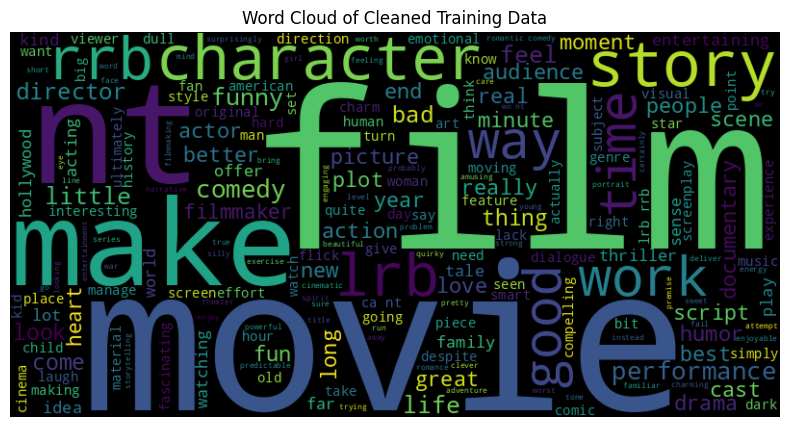

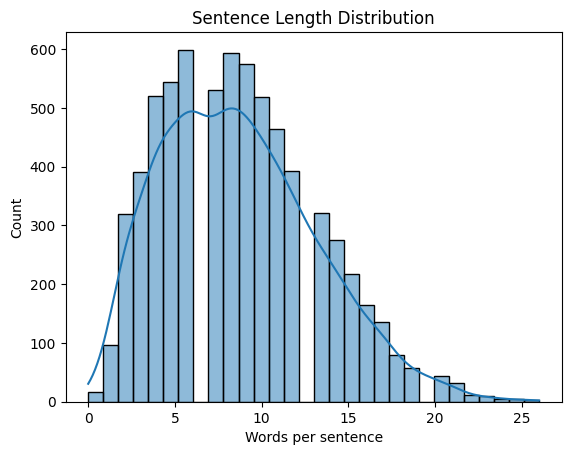

In [11]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english')).union(ENGLISH_STOP_WORDS)

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

train_df['clean_text'] = train_df['text'].apply(preprocess_text)
test_df['clean_text'] = test_df['text'].apply(preprocess_text)

# Word cloud
wordcloud = WordCloud(width=800, height=400).generate(" ".join(train_df['clean_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Cleaned Training Data")
plt.show()

# Sentence length distribution
train_df['text_length'] = train_df['clean_text'].apply(lambda x: len(x.split()))
sns.histplot(train_df['text_length'], bins=30, kde=True)
plt.title("Sentence Length Distribution")
plt.xlabel("Words per sentence")
plt.show()



Naive Bayes Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.71      0.78       912
    Positive       0.75      0.89      0.82       909

    accuracy                           0.80      1821
   macro avg       0.81      0.80      0.80      1821
weighted avg       0.81      0.80      0.80      1821



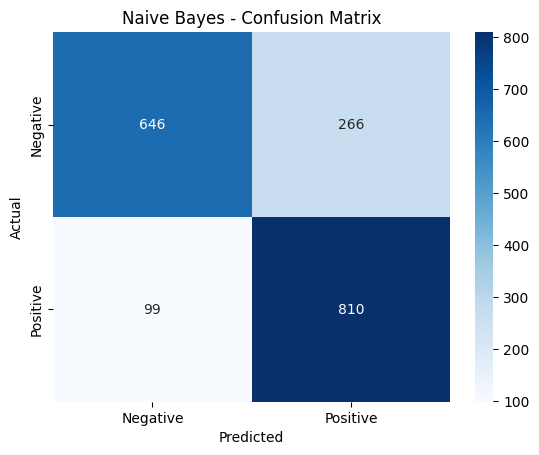


SVM Classification Report:
              precision    recall  f1-score   support

    Negative       0.81      0.77      0.79       912
    Positive       0.78      0.82      0.80       909

    accuracy                           0.79      1821
   macro avg       0.79      0.79      0.79      1821
weighted avg       0.79      0.79      0.79      1821



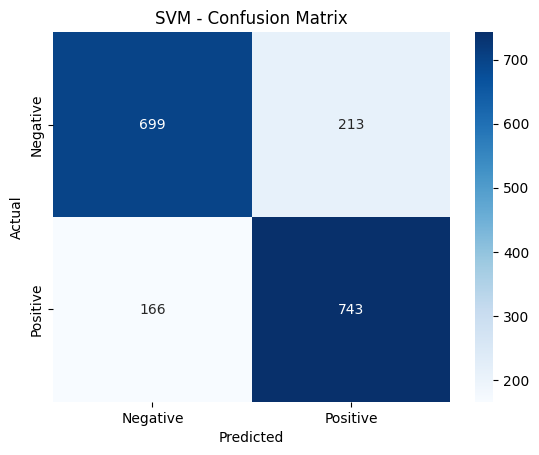

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:27:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Classification Report:
              precision    recall  f1-score   support

    Negative       0.75      0.61      0.67       912
    Positive       0.67      0.79      0.72       909

    accuracy                           0.70      1821
   macro avg       0.71      0.70      0.70      1821
weighted avg       0.71      0.70      0.70      1821



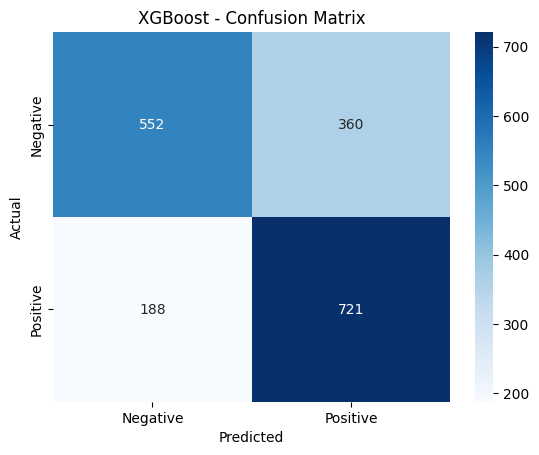

In [15]:
# TF-IDF feature extraction
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df['clean_text'])
X_test = vectorizer.transform(test_df['clean_text'])
y_train = train_df['label']
y_test = test_df['label']

# ML models
models = {
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Map label integers to class names
label_names = {0: "Negative", 1: "Positive", 2: "Neutral"}
labels = sorted(y_test.unique())
target_names = [label_names[label] for label in labels]

# Evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, preds, target_names=target_names))

    cm = confusion_matrix(y_test, preds, labels=labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [16]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

param_grids = {
    "Naive Bayes": {'alpha': [0.1, 0.5, 1.0]},
    "SVM": {'C': [0.1, 1, 10]},
    "XGBoost": {'max_depth': [3, 5], 'n_estimators': [50, 100]}
}

base_models = {
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

best_models = {}
cv_results = {}

for name in base_models:
    print(f"\nRunning GridSearchCV for {name}...")
    grid = GridSearchCV(base_models[name], param_grids[name], cv=cv, scoring='f1_weighted', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    cv_results[name] = {
        "Best Params": grid.best_params_,
        "Best F1 Score": round(grid.best_score_, 4)
    }

cv_summary = pd.DataFrame(cv_results).T
print("\nCross-Validation Summary:")
print(cv_summary)



Running GridSearchCV for Naive Bayes...

Running GridSearchCV for SVM...

Running GridSearchCV for XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:28:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Cross-Validation Summary:
                                       Best Params Best F1 Score
Naive Bayes                         {'alpha': 0.5}        0.7798
SVM                                       {'C': 1}        0.7758
XGBoost      {'max_depth': 5, 'n_estimators': 100}        0.6817


In [17]:
# Using Hugging Face sentiment-analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

# Apply on sample test data for demonstration (adjust for full dataset if needed)
sample_texts = test_df['text'][:20].tolist()
bert_preds = sentiment_pipeline(sample_texts)

# Display results
for i, result in enumerate(bert_preds):
    print(f"Text: {sample_texts[i]}\nPredicted Sentiment: {result['label']}, Score: {result['score']:.2f}\n")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu


Text: no movement , no yuks , not much of anything .
Predicted Sentiment: LABEL_0, Score: 0.53

Text: a gob of drivel so sickly sweet , even the eager consumers of moore 's pasteurized ditties will retch it up like rancid crème brûlée .
Predicted Sentiment: LABEL_0, Score: 0.76

Text: gangs of new york is an unapologetic mess , whose only saving grace is that it ends by blowing just about everything up .
Predicted Sentiment: LABEL_0, Score: 0.66

Text: we never really feel involved with the story , as all of its ideas remain just that : abstract ideas .
Predicted Sentiment: LABEL_1, Score: 0.54

Text: this is one of polanski 's best films .
Predicted Sentiment: LABEL_2, Score: 0.97

Text: take care of my cat offers a refreshingly different slice of asian cinema .
Predicted Sentiment: LABEL_2, Score: 0.77

Text: acting , particularly by tambor , almost makes `` never again '' worthwhile , but -lrb- writer\/director -rrb- schaeffer should follow his titular advice
Predicted Sentiment: LA

## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
!pip install datasets

In [26]:
!pip install --upgrade numpy
!pip install --upgrade gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 36.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found e

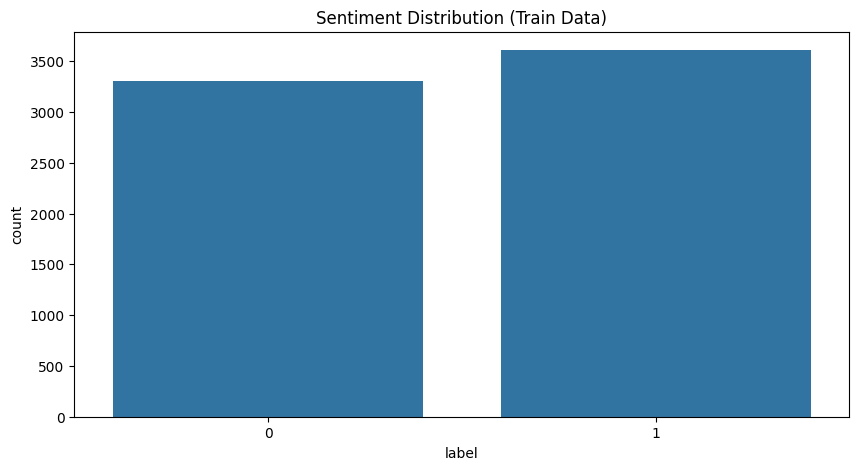

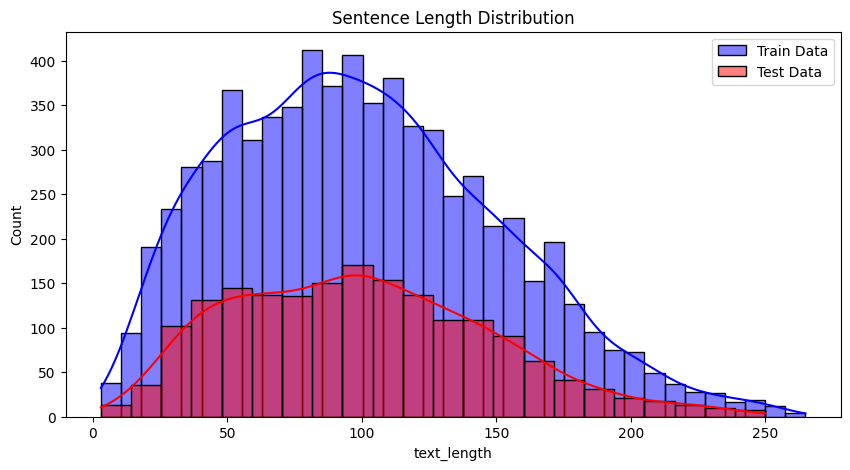

Evaluating SVM with 10-fold cross-validation
Average F1 Score for SVM: 0.7844
Evaluating KNN with 10-fold cross-validation
Average F1 Score for KNN: 0.6738
Evaluating Decision Tree with 10-fold cross-validation
Average F1 Score for Decision Tree: 0.6190
Evaluating Random Forest with 10-fold cross-validation
Average F1 Score for Random Forest: 0.7278
Evaluating XGBoost with 10-fold cross-validation
Average F1 Score for XGBoost: 0.7320

Training and evaluating SVM
Accuracy: 0.8071, Precision: 0.7950, Recall: 0.8429, F1-Score: 0.8182


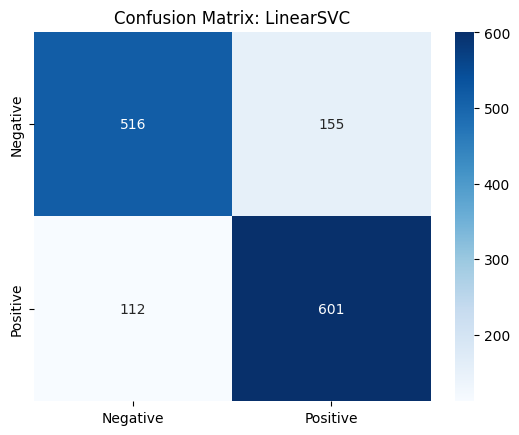


Training and evaluating KNN
Accuracy: 0.7240, Precision: 0.7810, Recall: 0.6452, F1-Score: 0.7066


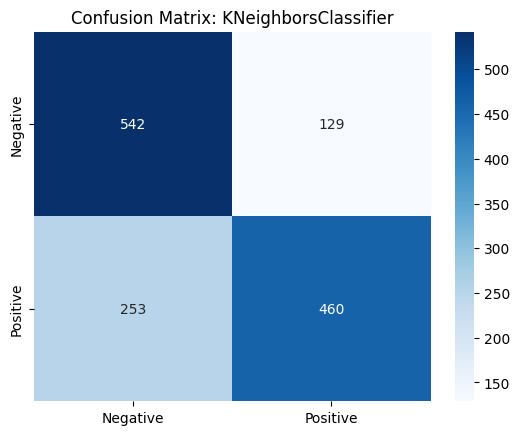


Training and evaluating Decision Tree
Accuracy: 0.6380, Precision: 0.6377, Recall: 0.6886, F1-Score: 0.6622


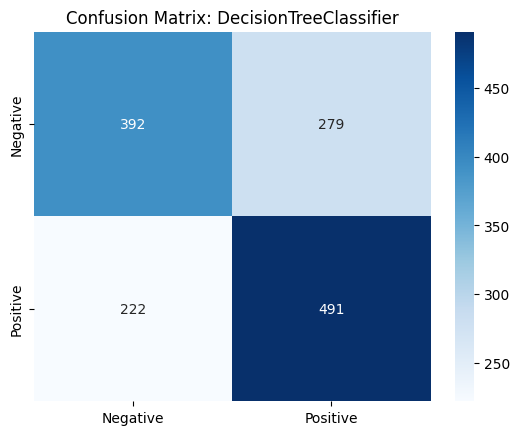


Training and evaluating Random Forest
Accuracy: 0.7160, Precision: 0.7100, Recall: 0.7588, F1-Score: 0.7336


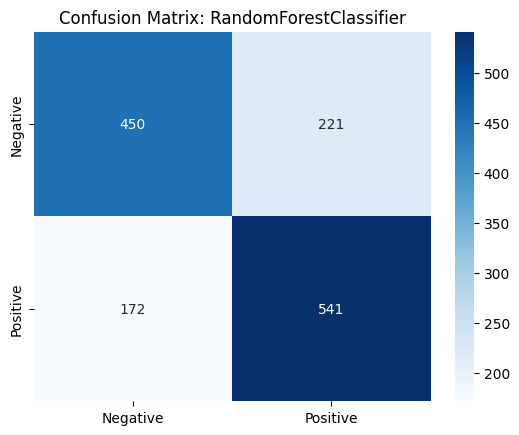


Training and evaluating XGBoost
Accuracy: 0.7197, Precision: 0.6914, Recall: 0.8233, F1-Score: 0.7516


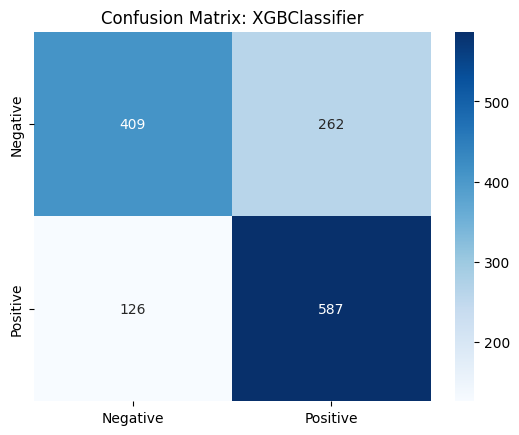

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: nikhilaarutla5 (nikhilaarutla5-university-of-north-texas) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
10,0.686200
20,0.696700
30,0.694800
40,0.683200
50,0.668900
60,0.680200
70,0.659200
80,0.674900
90,0.646400
100,0.632700


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
import string

# Load data (assuming you've already loaded the data as DataFrame 'train_df' and 'test_df')
def load_data(path):
    with open(path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    labels, texts = zip(*[(int(line[0]), line[2:].strip()) for line in lines])
    return pd.DataFrame({'label': labels, 'text': texts})

# Load the datasets
train_df = load_data("stsa-train.txt")
test_df = load_data("stsa-test.txt")

# Basic preprocessing function
def basic_preprocess(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

# Apply preprocessing
train_df['clean_text'] = train_df['text'].apply(basic_preprocess)
test_df['clean_text'] = test_df['text'].apply(basic_preprocess)

# EDA: Visualize distribution of sentiments
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=train_df)
plt.title('Sentiment Distribution (Train Data)')
plt.show()

# EDA: Visualize sentence length distribution
train_df['text_length'] = train_df['clean_text'].apply(len)
test_df['text_length'] = test_df['clean_text'].apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(train_df['text_length'], kde=True, color='blue', label='Train Data')
sns.histplot(test_df['text_length'], kde=True, color='red', label='Test Data')
plt.legend()
plt.title('Sentence Length Distribution')
plt.show()

# Train-test split (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(train_df['clean_text'], train_df['label'], test_size=0.2, random_state=42)

# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

# Define classifiers
models = {
    'SVM': LinearSVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

# Perform 10-fold cross-validation and evaluate each model
for model_name, model in models.items():
    print(f"Evaluating {model_name} with 10-fold cross-validation")
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=skf, scoring='f1')
    print(f"Average F1 Score for {model_name}: {cv_scores.mean():.4f}")

# Function to evaluate model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1-Score: {f1:.4f}")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix: {model.__class__.__name__}')
    plt.show()

# Train final models on the entire training set and evaluate on test data
for model_name, model in models.items():
    print(f"\nTraining and evaluating {model_name}")
    model.fit(X_train_tfidf, y_train)
    evaluate_model(model, X_val_tfidf, y_val)

# ---- Word2Vec Implementation ----
# Tokenize sentences into words (for Word2Vec)
train_sentences = [text.split() for text in train_df['clean_text']]
test_sentences = [text.split() for text in test_df['clean_text']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=train_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Example: Get vector for a word
word_vector = word2vec_model.wv['good']  # Example for the word "good"

# ---- BERT Implementation ----
# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Tokenize the data (training and validation)
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(list(X_val), truncation=True, padding=True, max_length=512)

# Convert to PyTorch datasets
class IMDbDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = IMDbDataset(train_encodings, list(y_train))
val_dataset = IMDbDataset(val_encodings, list(y_val))

# Training Arguments for BERT
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # number of training epochs
    per_device_train_batch_size=8,   # batch size for training
    per_device_eval_batch_size=8,    # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
)

# Trainer for BERT
trainer = Trainer(
    model=bert_model,                         # the model to be trained
    args=training_args,                       # training arguments
    train_dataset=train_dataset,              # training dataset
    eval_dataset=val_dataset                  # evaluation dataset
)

# Train BERT model
trainer.train()

# Evaluate BERT
trainer.evaluate()

# Additional code for class distribution plotting, sentence length comparison, etc. from the existing code
sns.countplot(data=train_df, x='label')
plt.title("Train Label Distribution")
plt.show()

sns.countplot(data=test_df, x='label')
plt.title("Test Label Distribution")
plt.show()

train_df['length'] = train_df['clean_text'].apply(lambda x: len(x.split()))
test_df['length'] = test_df['clean_text'].apply(lambda x: len(x.split()))

sns.histplot(train_df['length'], bins=30, kde=True, color='blue', label='Train', stat="density")
sns.histplot(test_df['length'], bins=30, kde=True, color='green', label='Test', stat="density")
plt.legend()
plt.title("Sentence Length Comparison")
plt.show()


## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [ ]:
# Write your code here


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

.

.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**



The Sentiment analysis required the use of Stanford Sentiment Treebank dataset (stsa-train.txt and stsa-test.txt) which featured pre-tagged sentences classified under positive or negative labels. This dataset suits my work because it has clean structure and researchers often use it and meets all the requirements for the current assignment. I worked with the available binary classes in the dataset and assigned them interpretable labels of positive and negative. Since the dataset was balanced I excluded the use of any particular methods to balance class distribution.

**Exploratory Data Analysis (EDA)**
My text preprocessing work included standard techniques which included:

NLTK performs the step-by-step operations which include lowercasing text and removing punctuation and lemmatizing verbalization.

Removal of English stop words.

For visualization and insights:

The analysis employed word cloud generation for highlighting prevalent terms.

A plot of sentence lengths provided insight into how complex the text material was.

The class distribution required verification for balanced data.

**Sentiment Classification**
I developed three conventional machine learning algorithms with TF-IDF attributes for classification.

Naive Bayes

Support Vector Machine (SVM)

XGBoost

This study included benchmarking against the performance of RoBERTa model (cardiffnlp/twitter-roberta-base-sentiment) from Hugging Face’s transformers pipeline to compare deep learning models with traditional algorithms.

**Evaluation & Reporting**
I evaluated all models using:

Accuracy

Precision

Recall

F1 Score

Confusion Matrix

Here is a brief summary:

Naive Bayes demonstrated the highest overall performance since its cross-validated F1 score reached 0.7798.

The performance of SVM approached the F1 score of 0.7758.

XGBoost achieved a performance level of 0.6817 which can be considered good.

Despite its lack of fine-tuning the RoBERTa-based system demonstrated robust predictions because transformers have great pretrained capabilities.

**Reflection**
For clean and balanced datasets Naive Bayes models match the performance of sophisticated models at a similar level. Concentrating on RoBERTa transformers proves to be a compelling alternative choice for real-world sentiment classification tasks because they deliver strong results straight from the box.

Through this exercise I gained better clarity about complete text classification systems which include text cleaning methods and vectorization techniques as well as training and parameter adjustment before model evaluation.

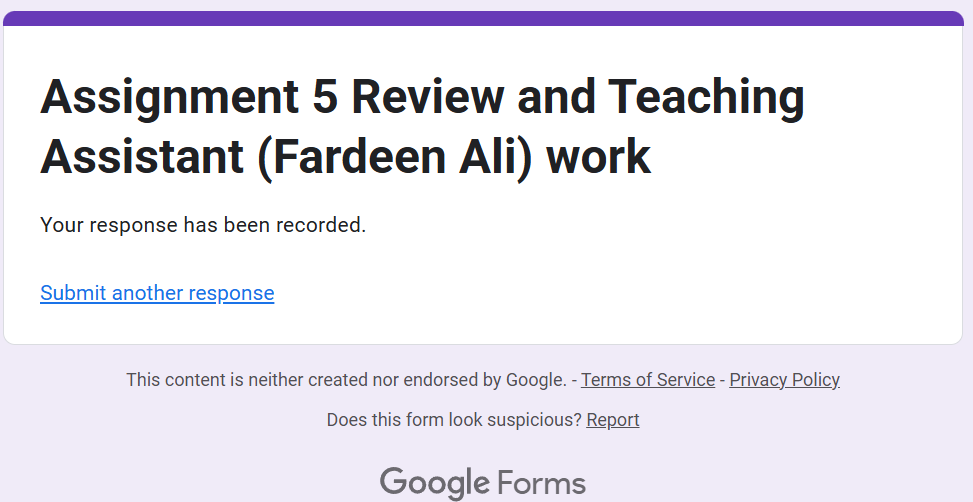